In [602]:
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import drlqap.experiment as exp
from drlqap.evaltools import load_float_txt
import numpy as np
import json

In [574]:
runs_root = Path('../runs')
for c in runs_root.iterdir():
    print(c.name)

dqn_dense_ec_eps0_norm_study_2
dqn_dense_ms_ec_eps0_smallrandoms
reinforce_ms100x_mediumrandoms
dqn_linkedqap_smallrandoms
a2c_ms100x_mediumrandoms_cyclic_wronglr
reinforce_ms100x_smallrandoms
a2c_ms100x_mediumrandoms
a2c_ms100x_mediumrandoms_cyclic
dqn_dense_ec_eps0_norm_study
dqn_dense_ms_ec_eps0_mediumrandoms
a2c_ms100x_mediumrandoms_stepped
dqn_dense_ms_ec_mediumrandoms
a2c_mediumrandoms
dqn_dense_ms_ec_eps0_rni_study


In [559]:
def load_experiments(experiment_names):
    paths = []
    for experiment in experiment_names:
        paths += sorted((runs_root / experiment).iterdir())

    metadatas = [exp.load_metadata(path) for path in paths]
    values = [load_float_txt(path / "value.txt") for path in paths]

    metadata = [
        {
            'path': path,
            'seed': meta['seed'],
            'agent_type': meta['agent_type'],
            **meta['agent_arguments'],
        }
        for path, meta in zip(paths, metadatas)
    ]
    meta_df = pd.DataFrame(metadata).fillna(-1) # default values == -1
    meta_index = pd.MultiIndex.from_frame(meta_df)
    return pd.DataFrame(values, index = meta_index)

In [560]:
def aggregate(df, key, window, agg):
        return df.groupby(key).aggregate(agg).transpose().rolling(window).mean()

def generate_variation_plot(df, keys, window):
    if type(keys) != list:
        keys = [keys]
    
    mean = aggregate(df, keys, window, 'mean')
    upper = aggregate(df, keys, window, 'max')
    lower = aggregate(df, keys, window, 'min')
    cmap = matplotlib.cm.get_cmap('tab10')
    count = len(mean.columns)
    for i, col in enumerate(mean.columns):
        color = cmap(i)
        #plt.fill_between(mean[col].index, lower[col], upper[col], alpha=0.1, color=color)
        if len(keys) > 1:
            matching_indices = None
            for i, k in enumerate(keys):
                m = df.index.get_level_values(k) == col[i] 
                matching_indices = matching_indices & m if matching_indices is not None else m
        else:
            matching_indices = (df.index.get_level_values(keys[0]) == col)
        individuals = df[matching_indices].transpose().rolling(window).mean()
        for i in individuals:
            plt.plot(individuals[i], alpha=0.15, linewidth=8, color=color)
        plt.plot(mean[col], label=col, color=color, linewidth=2)
    plt.legend()

# Plots on medium_random_graphs (n=16)

## DQN vs A2C

In [561]:
df = load_experiments(["a2c_ms100x_mediumrandoms", "dqn_dense_ms_ec_eps0_mediumrandoms"])
df = df.query('agent_type != "dqn_dense_ms_ec_eps0" | learning_rate > 1e-5') # Drop bad DQN lr

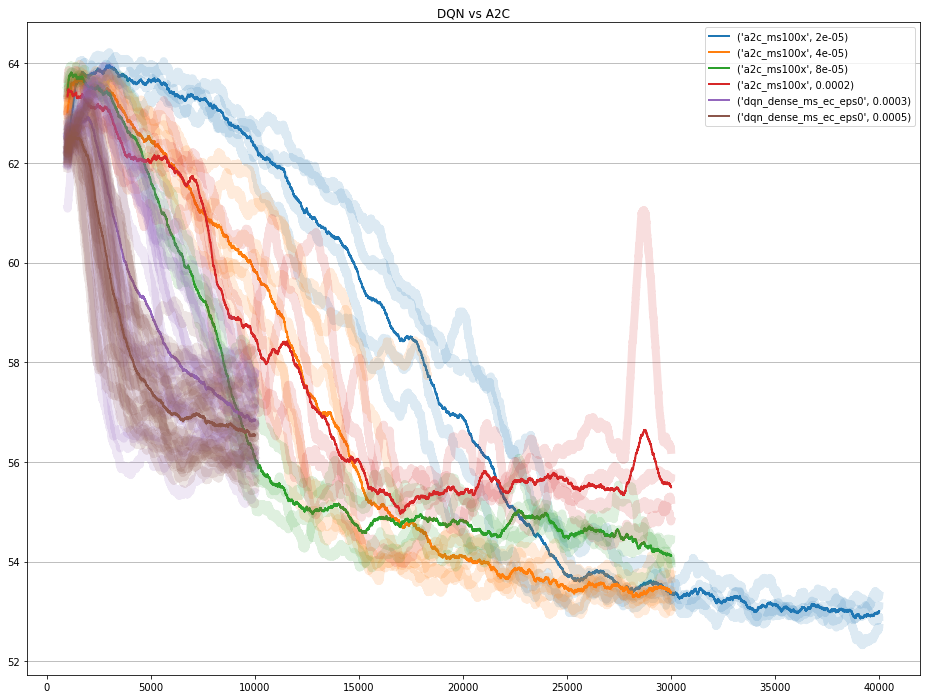

In [562]:
plt.figure(figsize=(16, 12))
plt.title("DQN vs A2C")
plt.grid(axis='y')
generate_variation_plot(df, ['agent_type', 'learning_rate'], 1000)

## A2C hyperparameters

In [627]:
df = load_experiments(["a2c_ms100x_mediumrandoms"])

In [628]:
df

0      \
path                                               seed agent_type learning_rate gnn_depth mlp_depth              
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s1         1    a2c_ms100x 0.00020       -1.0      -1.0       55.767970   
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s2         2    a2c_ms100x 0.00020       -1.0      -1.0       56.686836   
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s3         3    a2c_ms100x 0.00020       -1.0      -1.0       63.027261   
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s4         4    a2c_ms100x 0.00020       -1.0      -1.0       60.797271   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s1         1    a2c_ms100x 0.00002       -1.0      -1.0       55.040481   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s2         2    a2c_ms100x 0.00002       -1.0      -1.0       60.005638   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s3         3    a2c_ms100x 0.00002       -1.0      -1.0       65.511402   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s4         4    a2c_ms100x 0.00002       -1.0      -1.0       58.249549   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1         1    a2c_ms100x 0.00004       -1.0      -1.0       56.110544   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md2 1    a2c_ms100x 0.00004        4.0       2.0       56.865747   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md4 1    a2c_ms100x 0.00004        4.0       4.0       55.767970   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md6 1    a2c_ms100x 0.00004        4.0       6.0       55.767970   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s2         2    a2c_ms100x 0.00004       -1.0      -1.0       56.686836   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s3         3    a2c_ms100x 0.00004       -1.0      -1.0       61.103354   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s4         4    a2c_ms100x 0.00004       -1.0      -1.0       60.992642   
../runs/a2c_ms100x_mediumrandoms/lr8e-5_s1         1    a2c_ms100x 0.00008       -1.0      -1.0       57.026061   
../runs/a2c_ms100x_mediumrandoms/lr8e-5_s2         2    a2c_ms100x 0.00008       -1.0      -1.0       58.168280   
../runs/a2c_ms100x_mediumrandoms/lr8e-5_s3         3    a2c_ms100x 0.00008       -1.0      -1.0       62.611657   
../runs/a2c_ms100x_mediumrandoms/lr8e-5_s4         4    a2c_ms100x 0.00008       -1.0      -1.0       58.283660   

                                                                                                          1      \
path                                               seed agent_type learning_rate gnn_depth mlp_depth              
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s1         1    a2c_ms100x 0.00020       -1.0      -1.0       56.846410   
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s2         2    a2c_ms100x 0.00020       -1.0      -1.0       64.999871   
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s3         3    a2c_ms100x 0.00020       -1.0      -1.0       60.341001   
../runs/a2c_ms100x_mediumrandoms/lr2e-4_s4         4    a2c_ms100x 0.00020       -1.0      -1.0       68.739039   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s1         1    a2c_ms100x 0.00002       -1.0      -1.0       60.561438   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s2         2    a2c_ms100x 0.00002       -1.0      -1.0       67.857819   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s3         3    a2c_ms100x 0.00002       -1.0      -1.0       58.410426   
../runs/a2c_ms100x_mediumrandoms/lr2e-5_s4         4    a2c_ms100x 0.00002       -1.0      -1.0       68.439381   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1         1    a2c_ms100x 0.00004       -1.0      -1.0       56.846410   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md2 1    a2c_ms100x 0.00004        4.0       2.0       62.869980   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md4 1    a2c_ms100x 0.00004        4.0       4.0       56.846410   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md6 1    a2c_ms100x 0.00004        4.0       6.0       56.846410   
../runs/a2c_ms100x_mediumrandoms/lr4e-5_s2         2    a2c_ms100x 0.00004      

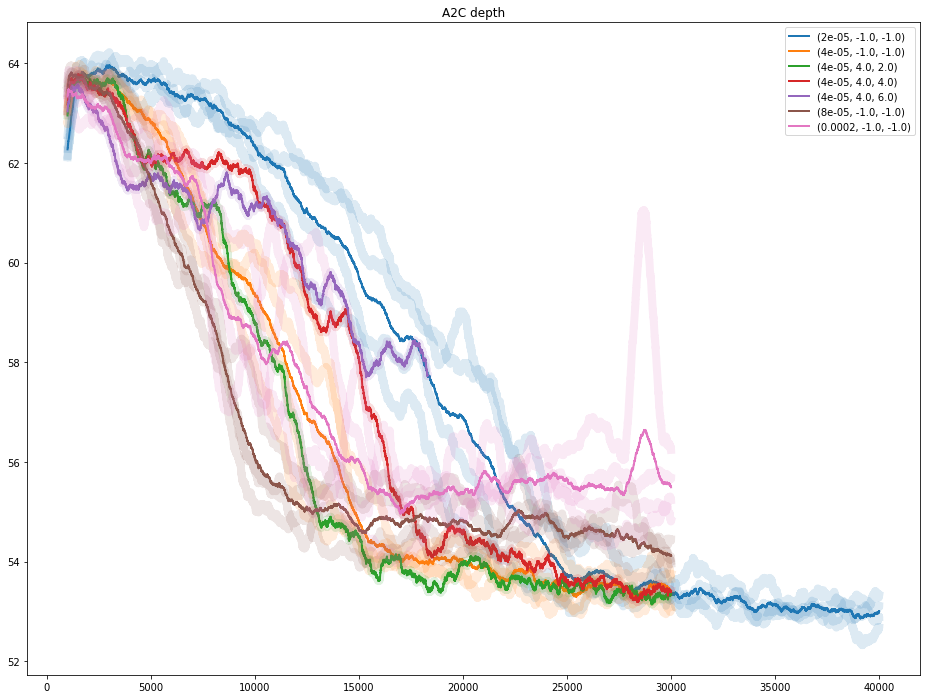

In [629]:
plt.figure(figsize=(16, 12))
plt.title("A2C depth")
generate_variation_plot(df, ['learning_rate', 'gnn_depth', 'mlp_depth'], 1000)

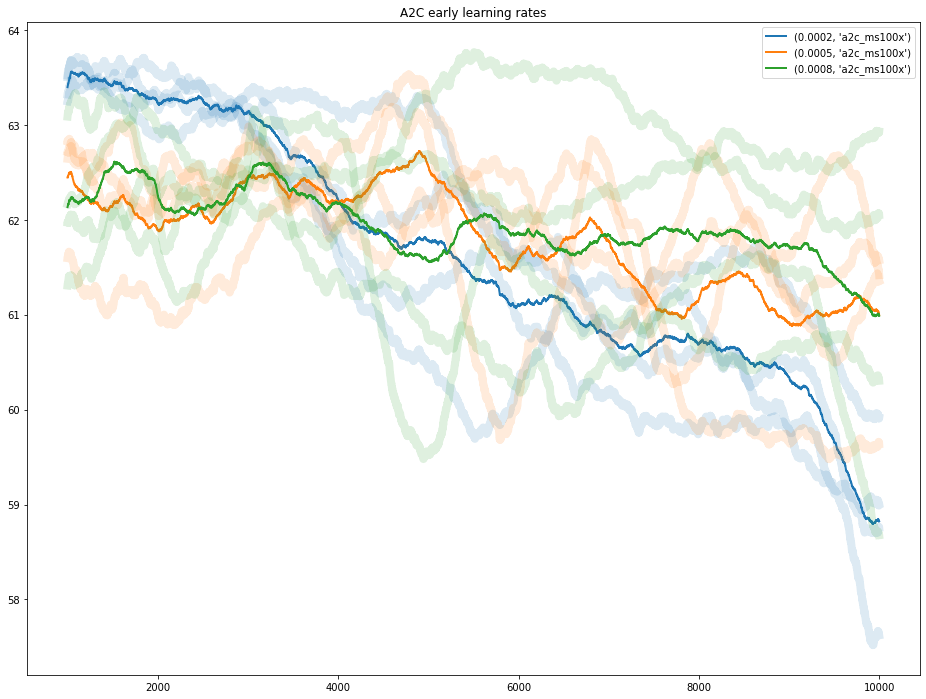

In [181]:
df = load_experiments(["a2c_mediumrandoms"])
plt.figure(figsize=(16, 12))
plt.title("A2C early learning rates")
generate_variation_plot(df.query('agent_type=="a2c_ms100x"'), ['learning_rate', 'agent_type'], 1000)

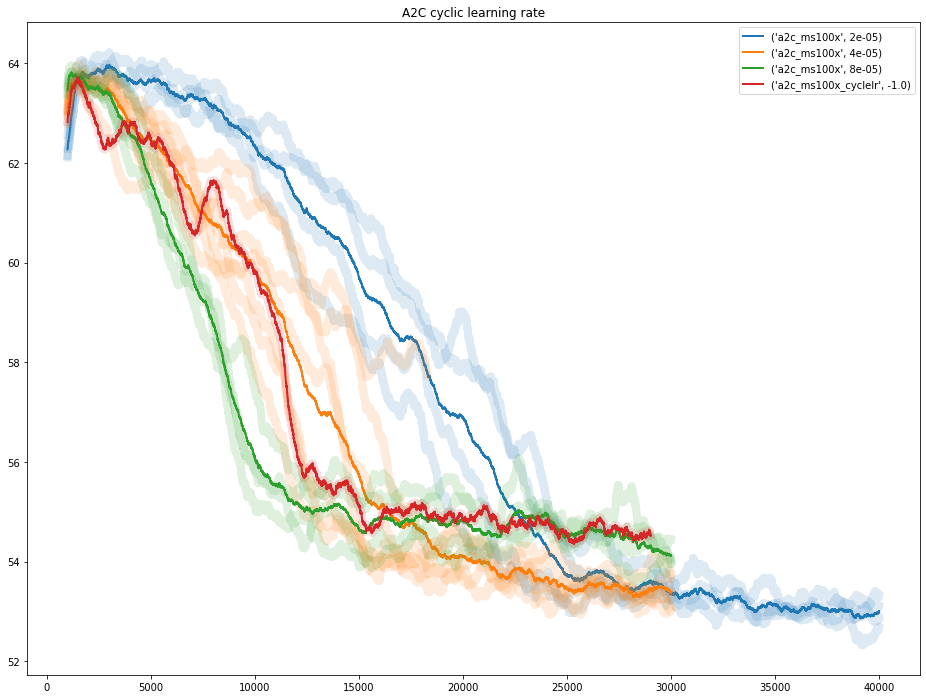

In [511]:
df = load_experiments(["a2c_ms100x_mediumrandoms_cyclic", "a2c_ms100x_mediumrandoms"])
plt.figure(figsize=(16, 12))
plt.title("A2C cyclic learning rate")
generate_variation_plot(df.query("learning_rate <= 8e-5"), ['agent_type', 'learning_rate'], 1000)

In [183]:
with open("../runs/a2c_ms100x_mediumrandoms_stepped/s1/learning_rate.txt") as f:
    lines = f.readlines()
    lrs = [float(l[1:-2]) for l in lines]

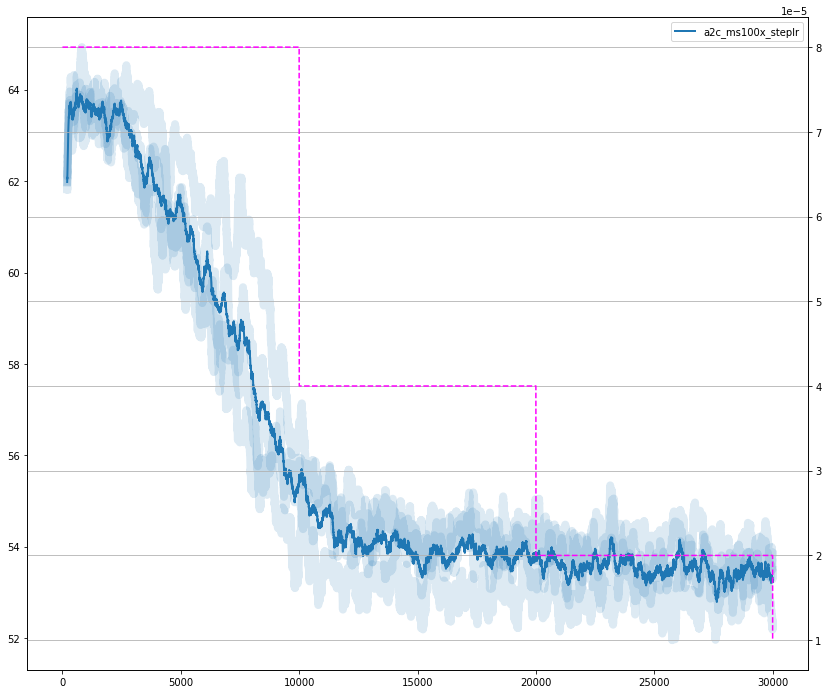

In [184]:
df = load_experiments(["a2c_ms100x_mediumrandoms_stepped"])

plt.figure(figsize=(14,12))
generate_variation_plot(df, ['agent_type'], 200)
ax2 = plt.gca().twinx()
ax2.plot(lrs, linestyle='dashed', color='magenta')
#ax2.semilogy()
plt.grid()

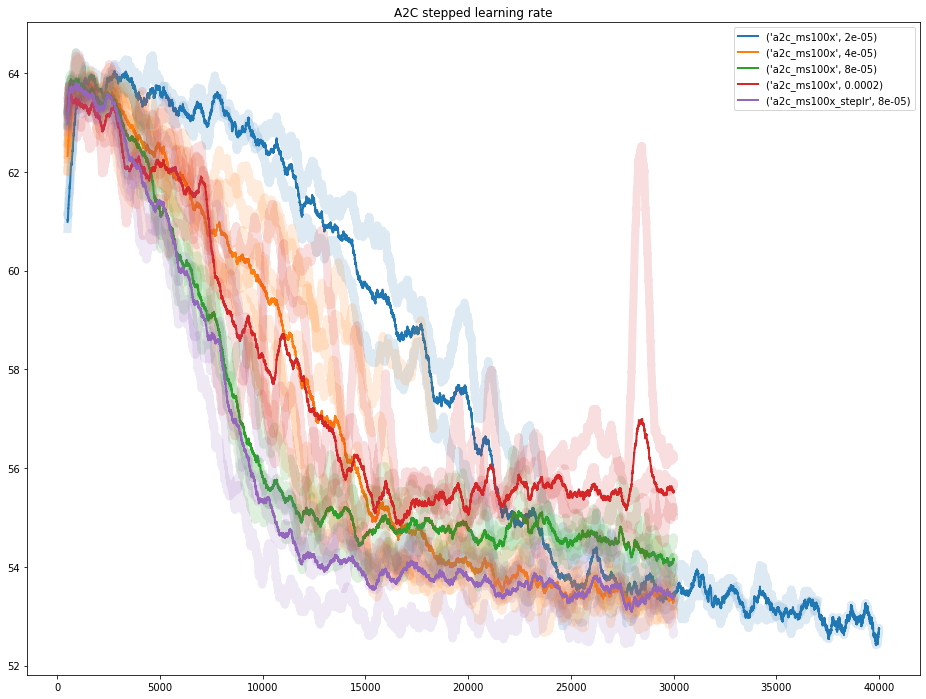

In [387]:
df = load_experiments(["a2c_ms100x_mediumrandoms_stepped", "a2c_ms100x_mediumrandoms"])
plt.figure(figsize=(16, 12))
plt.title("A2C stepped learning rate")
generate_variation_plot(df, ['agent_type', 'learning_rate'], 500)

In [504]:
def try_open(files):
    for f in files:
        try:
            return open(f)
        except FileNotFoundError:
            pass

def load_entropy_steps(path):
    path = Path(path)
    with try_open([path / "entropy_steps.txt", path / "episode_entropies.txt"]) as f:
        entropy_steps = [[float(w) for w in l.strip()[1:].split() if w] for l in f.read().split("]")[:-1]]
        return np.array(entropy_steps).transpose()
        
def generate_entropy_plot(entropy_steps):
    cmap = plt.get_cmap("rainbow")
    for i in range(15):
        series=pd.Series(entropy_steps[i])
        rolling = series.rolling(window=1000)
        max_entropy=np.log(np.square(16-i))
        plt.plot(rolling.mean()/max_entropy, alpha=0.5, color=cmap(i/16), label=f"Step {i}")
    plt.ylim(0,1.01)
    plt.legend()
    
def step_entropy_plot(entropy_steps, episode=-1, window=500):
    n = entropy_steps.shape[0]+1
    max_entropies = np.log(np.square(n - np.arange(n-1)))
    plt.plot(entropy_steps.transpose()[episode-window:episode].mean(axis=0) / max_entropies, label=f"Episode {episode} (mean of {window})")
    

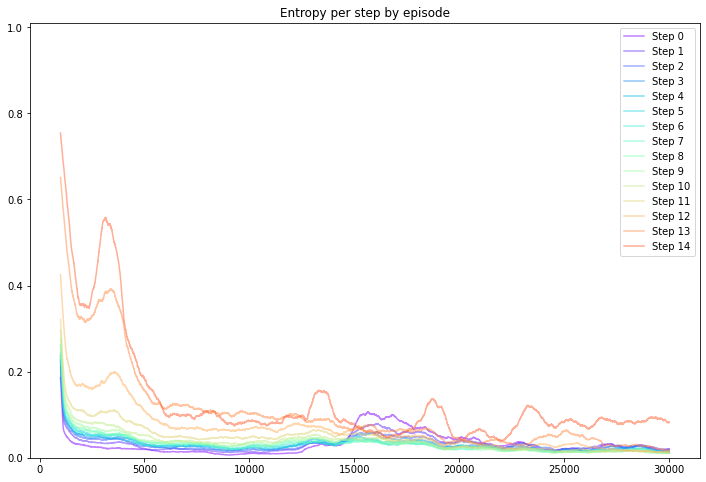

In [637]:
plt.figure(figsize=(12,8))
plt.title("Entropy per step by episode")
entropies = load_entropy_steps("../runs/a2c_ms100x_mediumrandoms/lr4e-5_s1_gd4_md4/")
generate_entropy_plot(entropies)

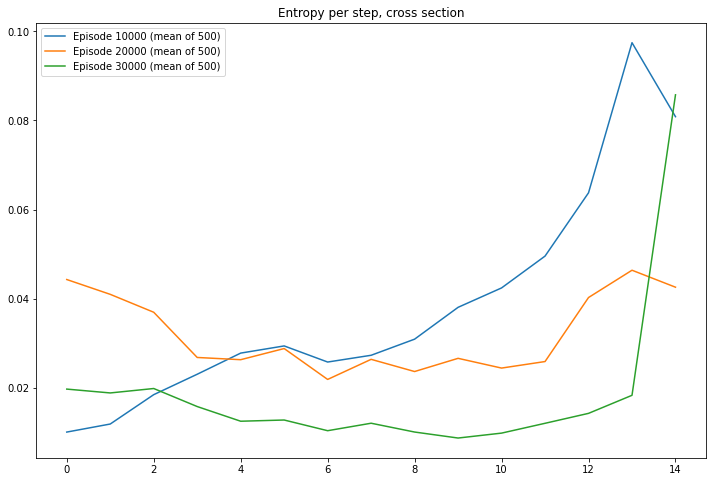

In [638]:
plt.figure(figsize=(12,8))
plt.title("Entropy per step, cross section")
step_entropy_plot(entropies, episode=10000)
step_entropy_plot(entropies, episode=20000)
step_entropy_plot(entropies, episode=30000)
#plt.semilogy()
plt.legend()

## DQN hyperparameters

In [515]:
df = load_experiments(["dqn_dense_ms_ec_eps0_mediumrandoms"])
df

0     \
path                                               seed agent_type           learning_rate gnn_depth hidden_size              
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       2         32           62.841865   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       2         64           60.356959   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       3         32           54.686776   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       3         64           58.385339   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       4         32           55.460938   
...                                                                                                                     ...   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       2         64           61.176668   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       3         32           58.853293   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       3         64           61.478632   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       4         32           55.929913   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       4         64           57.263823   

                                                                                                                       1     \
path                                               seed agent_type           learning_rate gnn_depth hidden_size              
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       2         32           65.490401   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       2         64           63.078010   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       3         32           58.461986   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       3         64           60.947965   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       4         32           59.356697   
...                                                                                                                     ...   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       2         64           71.078549   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       3         32           67.119416   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       3         64           66.584907   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       4         32           66.916919   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e... 4    dqn_dense_ms_ec_eps0 0.00050       4         64           67.691243   

                                                                                                                       2     \
path                                               seed agent_type           learning_rate gnn_depth hidden_size              
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       2         32           68.707125   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       2         64           66.283673   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       3         32           63.025775   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1    dqn_dense_ms_ec_eps0 0.00001       3         64           63.547658   
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e... 1 

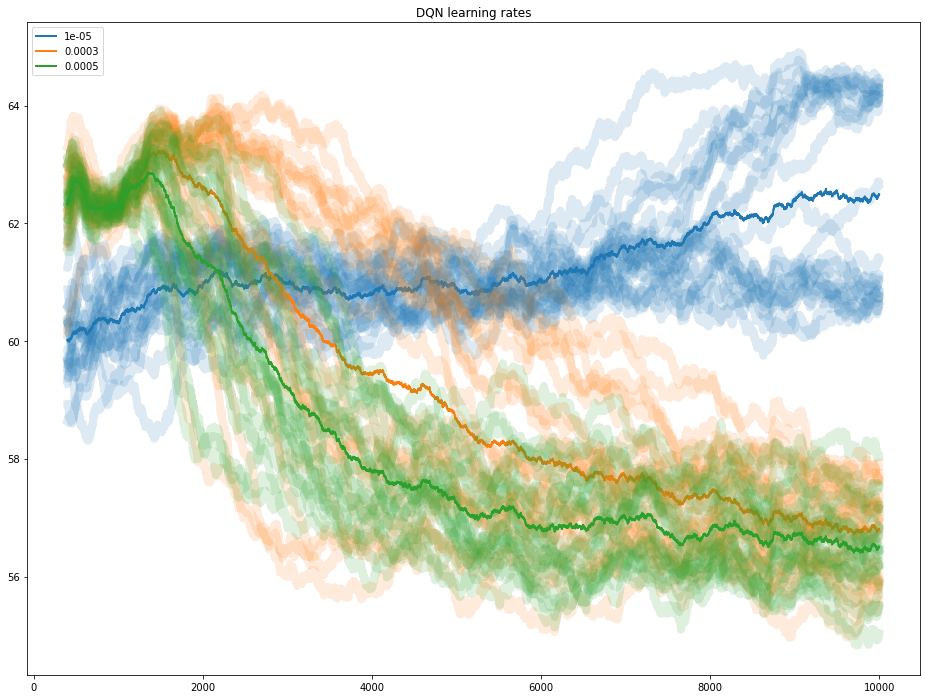

In [516]:
plt.figure(figsize=(16, 12))
plt.title("DQN learning rates")
generate_variation_plot(df, ['learning_rate'], 400)

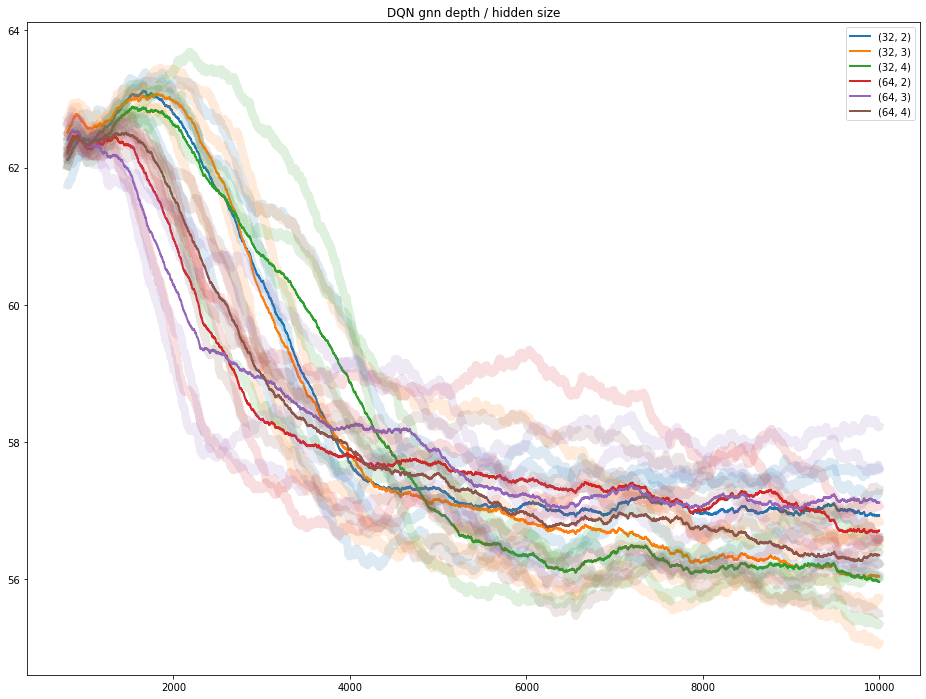

In [517]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth / hidden size")
generate_variation_plot(df.query('learning_rate == 5e-4'), ['hidden_size', 'gnn_depth'], 800)

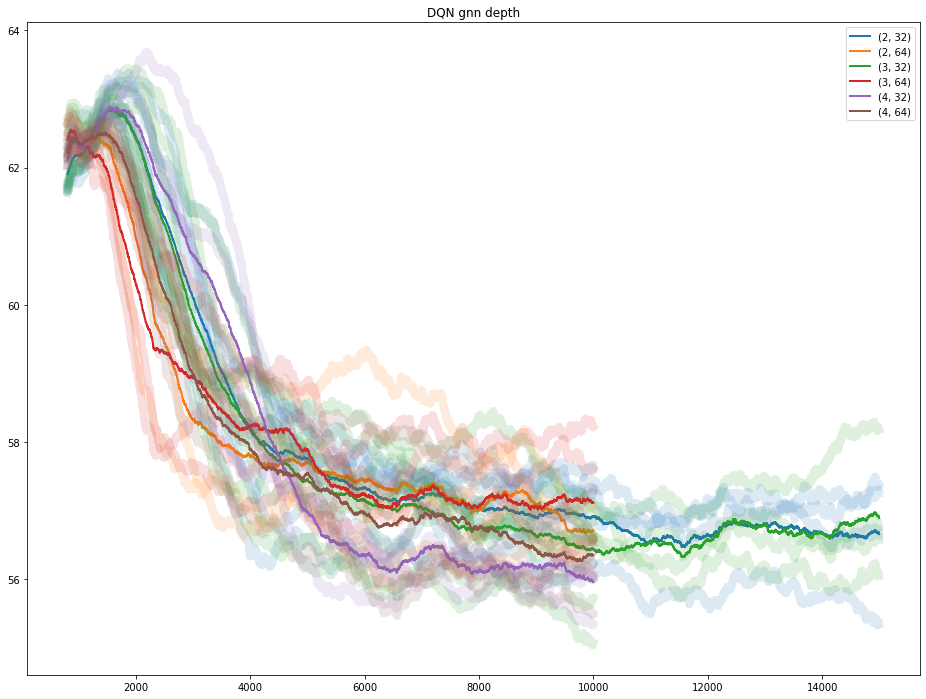

In [541]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth")
generate_variation_plot(df.query('learning_rate == 5e-4'), ['gnn_depth', 'hidden_size'], 800)

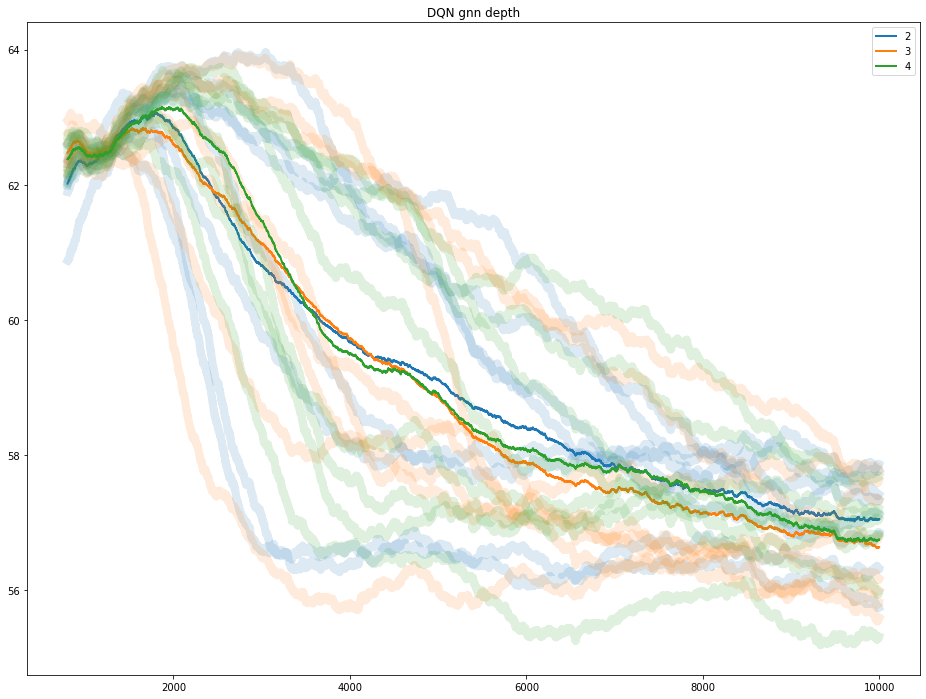

In [519]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth")
generate_variation_plot(df.query('learning_rate == 3e-4'), ['gnn_depth'], 800)

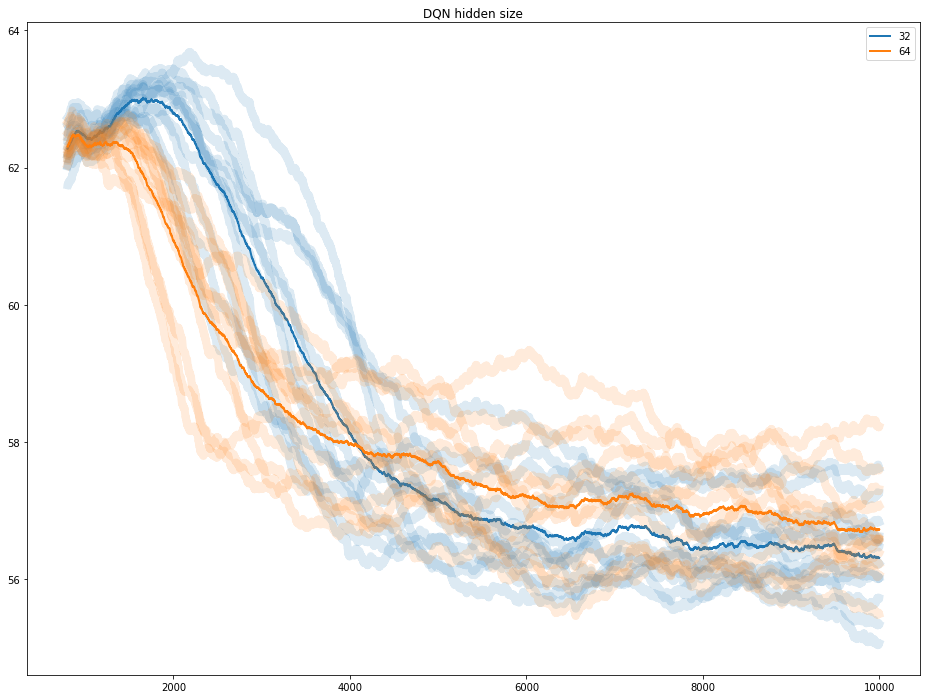

In [520]:
plt.figure(figsize=(16, 12))
plt.title("DQN hidden size")
generate_variation_plot(df.query('learning_rate == 5e-4'), ['hidden_size'], 800)

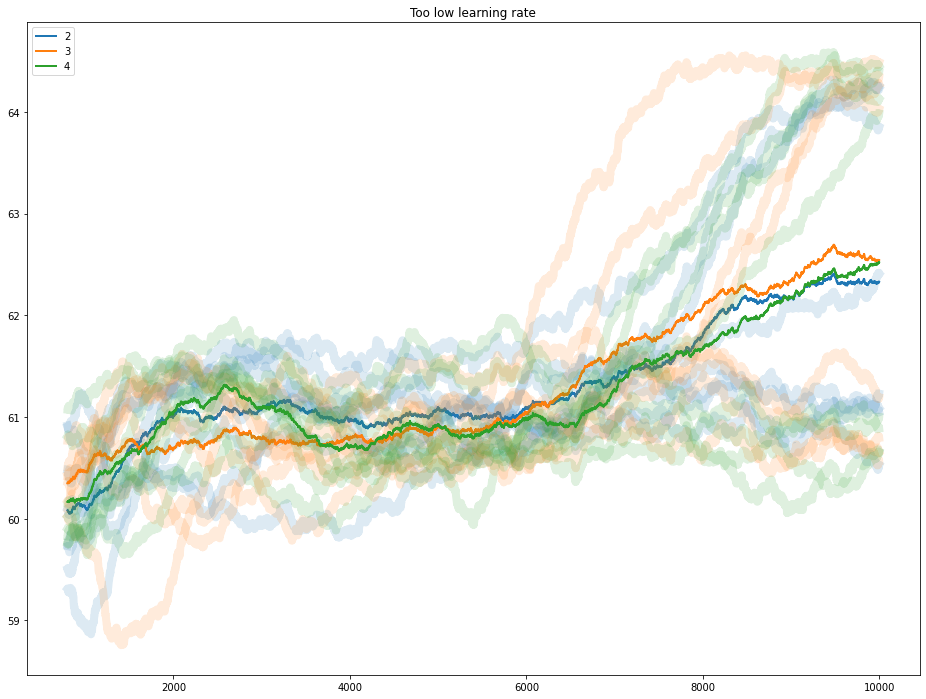

In [521]:
plt.figure(figsize=(16, 12))
plt.title("Too low learning rate")
generate_variation_plot(df.query('learning_rate == 1e-5'), ['gnn_depth'], 800)

### Epsilon vs no epsilon

In [547]:
df = load_experiments(["dqn_dense_ms_ec_mediumrandoms", "dqn_dense_ms_ec_eps0_mediumrandoms"])

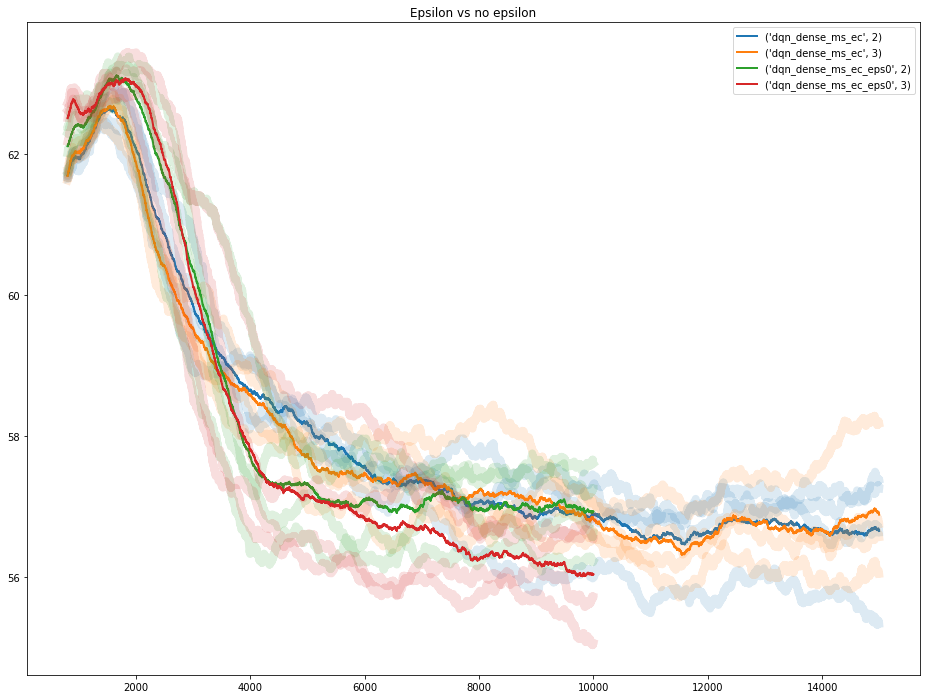

In [548]:
plt.figure(figsize=(16, 12))
plt.title("Epsilon vs no epsilon")
generate_variation_plot(df.query('learning_rate == 5e-4 & gnn_depth <= 3 & hidden_size == 32'), ['agent_type', 'gnn_depth'], 800)

### Norms

In [665]:
df = load_experiments(["dqn_dense_ec_eps0_norm_study"])

In [666]:
df

0     \
path                                               seed agent_type        learning_rate gnn_norm         gnn_depth              
../runs/dqn_dense_ec_eps0_norm_study/s0_None       0    dqn_dense_ec_eps0 0.0005        -1               2          17.754851   
../runs/dqn_dense_ec_eps0_norm_study/s0_None_2     0    dqn_dense_ec_eps0 0.0005        -1               3          18.286131   
../runs/dqn_dense_ec_eps0_norm_study/s0_None_3     0    dqn_dense_ec_eps0 0.0005        -1               4          18.154218   
../runs/dqn_dense_ec_eps0_norm_study/s0_batch_norm 0    dqn_dense_ec_eps0 0.0005        batch_norm       2          18.186270   
../runs/dqn_dense_ec_eps0_norm_study/s0_batch_n... 0    dqn_dense_ec_eps0 0.0005        batch_norm       3          17.005399   
...                                                                                                                       ...   
../runs/dqn_dense_ec_eps0_norm_study/s3_mean_se... 3    dqn_dense_ec_eps0 0.0005        mean_separation  3          17.310860   
../runs/dqn_dense_ec_eps0_norm_study/s3_mean_se... 3    dqn_dense_ec_eps0 0.0005        mean_separation  4          19.033034   
../runs/dqn_dense_ec_eps0_norm_study/s3_transfo... 3    dqn_dense_ec_eps0 0.0005        transformed_mean 2          16.580774   
../runs/dqn_dense_ec_eps0_norm_study/s3_transfo... 3    dqn_dense_ec_eps0 0.0005        transformed_mean 3          16.202442   
../runs/dqn_dense_ec_eps0_norm_study/s3_transfo... 3    dqn_dense_ec_eps0 0.0005        transformed_mean 4          16.783534   

                                                                                                                         1     \
path                                               seed agent_type        learning_rate gnn_norm         gnn_depth              
../runs/dqn_dense_ec_eps0_norm_study/s0_None       0    dqn_dense_ec_eps0 0.0005        -1               2          17.436692   
../runs/dqn_dense_ec_eps0_norm_study/s0_None_2     0    dqn_dense_ec_eps0 0.0005        -1               3          18.030674   
../runs/dqn_dense_ec_eps0_norm_study/s0_None_3     0    dqn_dense_ec_eps0 0.0005        -1               4          18.878601   
../runs/dqn_dense_ec_eps0_norm_study/s0_batch_norm 0    dqn_dense_ec_eps0 0.0005        batch_norm       2          17.574819   
../runs/dqn_dense_ec_eps0_norm_study/s0_batch_n... 0    dqn_dense_ec_eps0 0.0005        batch_norm       3          17.056675   
...                                                                                                                       ...   
../runs/dqn_dense_ec_eps0_norm_study/s3_mean_se... 3    dqn_dense_ec_eps0 0.0005        mean_separation  3          14.055196   
../runs/dqn_dense_ec_eps0_norm_study/s3_mean_se... 3    dqn_dense_ec_eps0 0.0005        mean_separation  4          13.897700   
../runs/dqn_dense_ec_eps0_norm_study/s3_transfo... 3    dqn_dense_ec_eps0 0.0005        transformed_mean 2          14.101272   
../runs/dqn_dense_ec_eps0_norm_study/s3_transfo... 3    dqn_dense_ec_eps0 0.0005        transformed_mean 3          12.761659   
../runs/dqn_dense_ec_eps0_norm_study/s3_transfo... 3    dqn_dense_ec_eps0 0.0005        transformed_mean 4          13.436689   

                                                                                                                         2     \
path                                               seed agent_type        learning_rate gnn_norm         gnn_depth              
../runs/dqn_dense_ec_eps0_norm_study/s0_None       0    dqn_dense_ec_eps0 0.0005        -1               2          11.873418   
../runs/dqn_dense_ec_eps0_norm_study/s0_None_2     0    dqn_dense_ec_eps0 0.0005        -1               3          11.603913   
../runs/dqn_dense_ec_eps0_norm_study/s0_None_3     0    dqn_dense_ec_eps0 0.0005        -1               4          10.832065   
../runs/dqn_dense_ec_eps0_norm_study/s0_batch_norm 0    dqn_dense_ec_eps0 0.0005        batch_norm       2          11.2

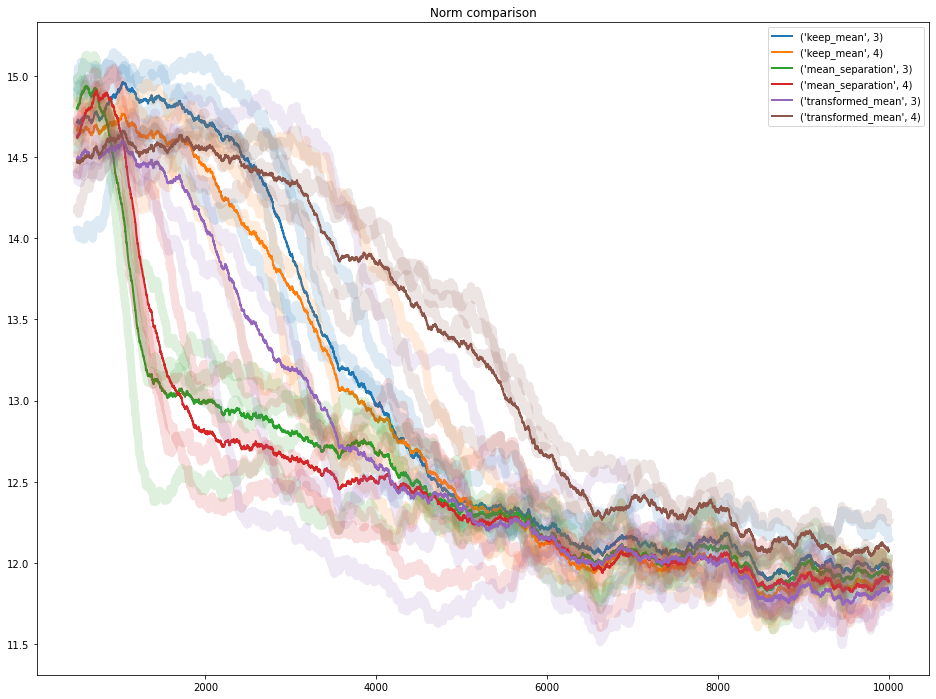

In [670]:
plt.figure(figsize=(16, 12))
plt.title("Norm comparison")
generate_variation_plot(df.query('gnn_depth >= 3 & gnn_norm in ["keep_mean", "mean_separation", "transformed_mean"]'), ['gnn_norm', 'gnn_depth'], 500)

## A2C / DQN vs REINFORCE

In [657]:
df = load_experiments(["a2c_ms100x_mediumrandoms", "reinforce_ms100x_mediumrandoms"])
df.query('agent_type == "reinforce_ms100x"')

0      \
path                                             seed agent_type       learning_rate gnn_depth mlp_depth              
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s1 1    reinforce_ms100x 0.00020       -1.0      -1.0       55.767970   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s2 2    reinforce_ms100x 0.00020       -1.0      -1.0       58.414899   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s3 3    reinforce_ms100x 0.00020       -1.0      -1.0       64.271917   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s4 4    reinforce_ms100x 0.00020       -1.0      -1.0       59.165955   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s1 1    reinforce_ms100x 0.00004       -1.0      -1.0       56.993766   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s2 2    reinforce_ms100x 0.00004       -1.0      -1.0       58.105784   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s3 3    reinforce_ms100x 0.00004       -1.0      -1.0       63.027261   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s4 4    reinforce_ms100x 0.00004       -1.0      -1.0       57.915113   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s1 1    reinforce_ms100x 0.00008       -1.0      -1.0       55.767970   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s2 2    reinforce_ms100x 0.00008       -1.0      -1.0       55.390280   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s3 3    reinforce_ms100x 0.00008       -1.0      -1.0       63.233129   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s4 4    reinforce_ms100x 0.00008       -1.0      -1.0       57.574998   

                                                                                                              1      \
path                                             seed agent_type       learning_rate gnn_depth mlp_depth              
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s1 1    reinforce_ms100x 0.00020       -1.0      -1.0       60.074306   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s2 2    reinforce_ms100x 0.00020       -1.0      -1.0       64.999871   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s3 3    reinforce_ms100x 0.00020       -1.0      -1.0       60.341001   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s4 4    reinforce_ms100x 0.00020       -1.0      -1.0       67.612565   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s1 1    reinforce_ms100x 0.00004       -1.0      -1.0       60.074306   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s2 2    reinforce_ms100x 0.00004       -1.0      -1.0       66.122163   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s3 3    reinforce_ms100x 0.00004       -1.0      -1.0       60.341001   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s4 4    reinforce_ms100x 0.00004       -1.0      -1.0       67.571549   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s1 1    reinforce_ms100x 0.00008       -1.0      -1.0       60.074306   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s2 2    reinforce_ms100x 0.00008       -1.0      -1.0       65.374411   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s3 3    reinforce_ms100x 0.00008       -1.0      -1.0       61.567431   
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s4 4    reinforce_ms100x 0.00008       -1.0      -1.0       71.264181   

                                                                                                              2      \
path                                             seed agent_type       learning_rate gnn_depth mlp_depth              
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s1 1    reinforce_ms100x 0.00020       -1.0      -1.0       64.126662   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s2 2    reinforce_ms100x 0.00020       -1.0      -1.0       60.869191   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s3 3    reinforce_ms100x 0.00020       -1.0      -1.0       56.316754   
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s4 4    reinforce_ms100x 0.00020       -1.0      -1.0       55.389700   
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s1 1    reinforc

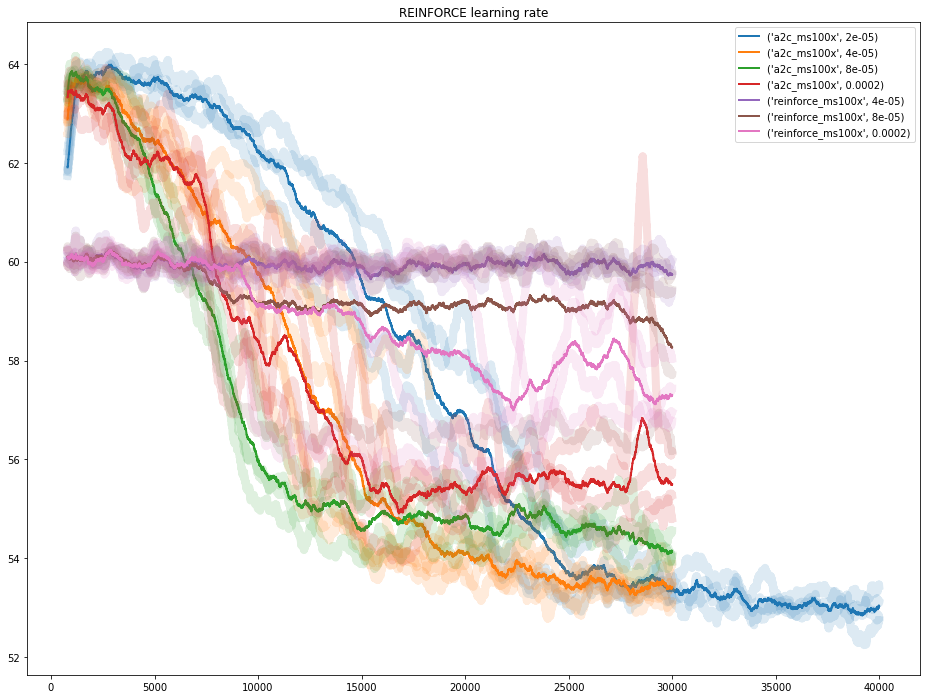

In [658]:
plt.figure(figsize=(16, 12))
plt.title("REINFORCE learning rate")
generate_variation_plot(df, ['agent_type', 'learning_rate'], 800)

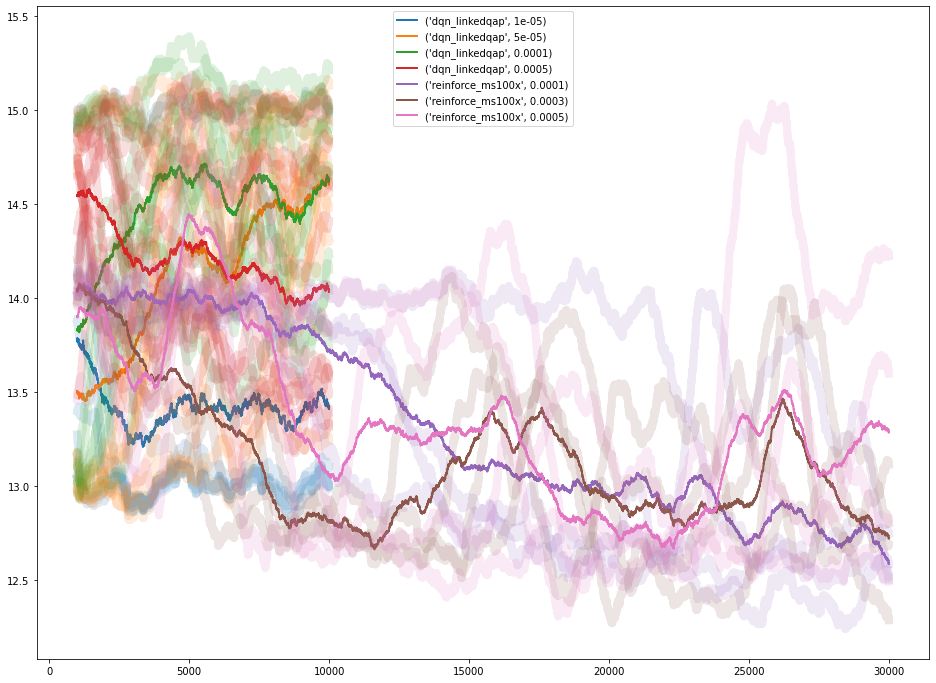

In [619]:
df = load_experiments(["dqn_linkedqap_smallrandoms", "reinforce_ms100x_smallrandoms"])
plt.figure(figsize=(16, 12))
generate_variation_plot(df, ['agent_type', 'learning_rate'], 1000)

## Reinforce learning rates

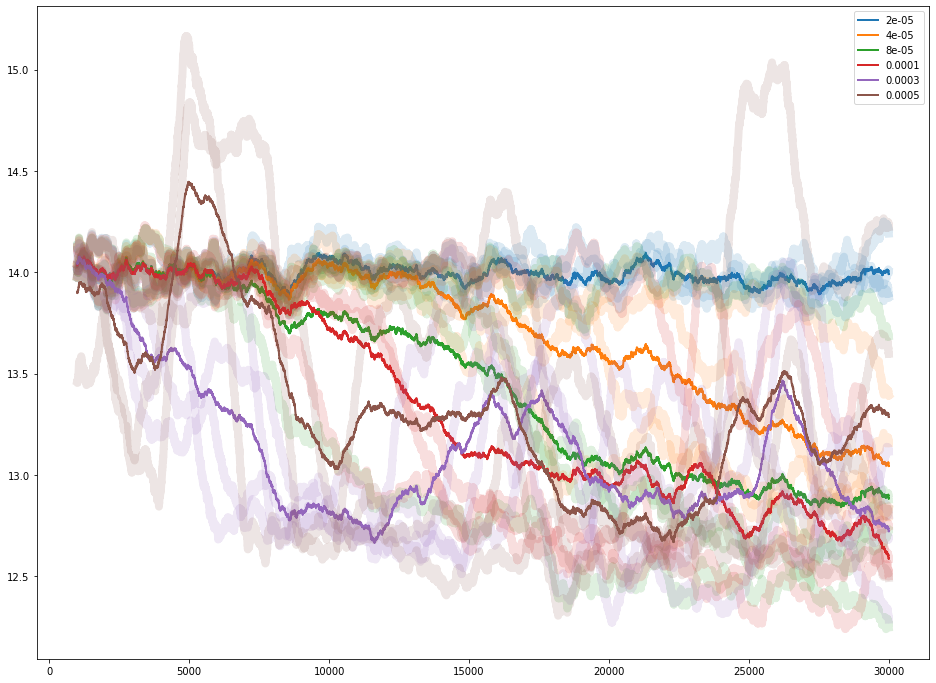

In [625]:
df = load_experiments(["reinforce_ms100x_smallrandoms"])
plt.figure(figsize=(16, 12))
generate_variation_plot(df, ['learning_rate'], 1000)